# Coursera Capstone Project
As part of the capstone project, this notebook will be used for analyzing data, applying key machine learning concepts and build a model to predict severity of accidents given various input variables

In [32]:
import pandas as pd
import numpy as np

print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [33]:
dpath = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(dpath)
df.head(5)

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [34]:

df_orig = df
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [35]:

df = df_orig
# drop all rows where X,Y, WEATHER, ROADCOND, LIGHTCOND are empty
df.dropna(subset=["X"], axis=0, inplace=True)
df.dropna(subset=["Y"], axis=0, inplace=True)
df.dropna(subset=["ROADCOND"], axis=0, inplace=True)
df.dropna(subset=["LIGHTCOND"], axis=0, inplace=True)
df.dropna(subset=["WEATHER"], axis=0, inplace=True)

In [36]:
# reset index
df.reset_index(drop=True, inplace=True)

In [37]:

#Replace all NaN by 0s and Ys by 1s
df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
df["INATTENTIONIND"].replace('Y', 1, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184167 entries, 0 to 184166
Data columns (total 38 columns):
SEVERITYCODE      184167 non-null int64
X                 184167 non-null float64
Y                 184167 non-null float64
OBJECTID          184167 non-null int64
INCKEY            184167 non-null int64
COLDETKEY         184167 non-null int64
REPORTNO          184167 non-null object
STATUS            184167 non-null object
ADDRTYPE          184167 non-null object
INTKEY            63144 non-null float64
LOCATION          184167 non-null object
EXCEPTRSNCODE     76548 non-null object
EXCEPTRSNDESC     2998 non-null object
SEVERITYCODE.1    184167 non-null int64
SEVERITYDESC      184167 non-null object
COLLISIONTYPE     184146 non-null object
PERSONCOUNT       184167 non-null int64
PEDCOUNT          184167 non-null int64
PEDCYLCOUNT       184167 non-null int64
VEHCOUNT          184167 non-null int64
INCDATE           184167 non-null object
INCDTTM           184167 non-null obje

In [39]:
df_var = df[['WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'SEVERITYCODE']]
df_var.head()

,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,Overcast,Wet,Daylight,NaN,2
1,Raining,Wet,Dark - Street Lights On,NaN,1
2,Overcast,Dry,Daylight,NaN,1
3,Clear,Dry,Daylight,NaN,1
4,Raining,Wet,Daylight,NaN,2


In [40]:
df_var['SPEEDING'] = df_var['SPEEDING'].map({'Y': 1})
df_var['SPEEDING'].replace(np.nan, 0, inplace=True)
df_var['SPEEDING'].value_counts().to_frame()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,SPEEDING
0.0,175460
1.0,8707


[Text(0, 0, 'Overcast'),
 Text(0, 0, 'Raining'),
 Text(0, 0, 'Clear'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Snowing'),
 Text(0, 0, 'Fog/Smog/Smoke'),
 Text(0, 0, 'Sleet/Hail/Freezing Rain'),
 Text(0, 0, 'Blowing Sand/Dirt'),
 Text(0, 0, 'Severe Crosswind'),
 Text(0, 0, 'Partly Cloudy')]

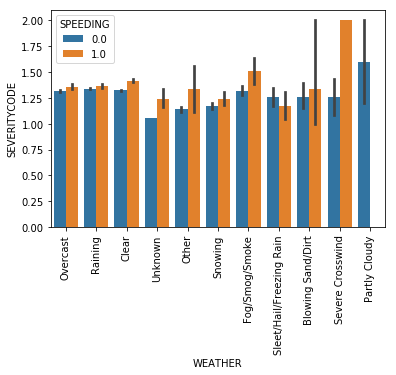

In [43]:
ax = sns.barplot(x="WEATHER", y="SEVERITYCODE", hue="SPEEDING", data=df_var)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


# Likewise, let's see how much ground condition and driver speed affect "SEVERITYCODE".

[Text(0, 0, 'Wet'),
 Text(0, 0, 'Dry'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Snow/Slush'),
 Text(0, 0, 'Ice'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Sand/Mud/Dirt'),
 Text(0, 0, 'Standing Water'),
 Text(0, 0, 'Oil')]

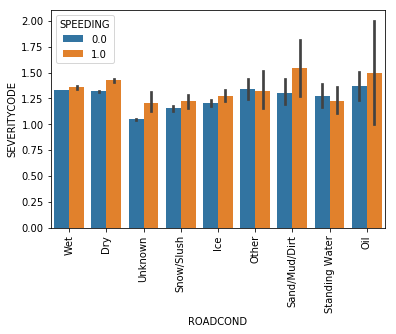

In [44]:
ax = sns.barplot(x="ROADCOND", y="SEVERITYCODE", hue="SPEEDING", data=df_var)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# we can also look at the effects of ambient light conditions and driver speed.

[Text(0, 0, 'Daylight'),
 Text(0, 0, 'Dark - Street Lights On'),
 Text(0, 0, 'Dark - No Street Lights'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Dusk'),
 Text(0, 0, 'Dawn'),
 Text(0, 0, 'Dark - Street Lights Off'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Dark - Unknown Lighting')]

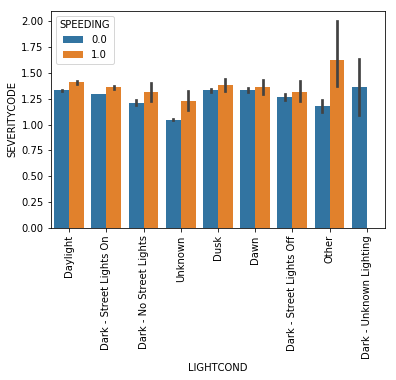

In [45]:
ax = sns.barplot(x="LIGHTCOND", y="SEVERITYCODE", hue="SPEEDING", data=df_var)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

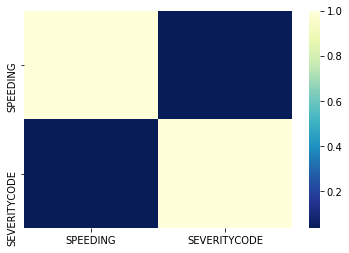

In [46]:
sns.heatmap(df_var.corr(), cmap='YlGnBu_r')

As can be seen, using the seaborn library, we can visualize the effects of several variables on the dependent variable in this way and examine their effects. Apart from that, with the matplotlib library, we can find the reasons for the accidents by accessing the numbers of accidents that occurred in various conditions

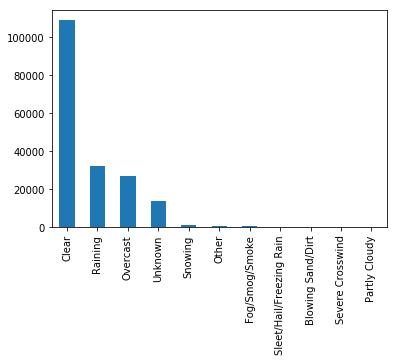

In [48]:
df_var["WEATHER"].value_counts().plot(kind = "bar")


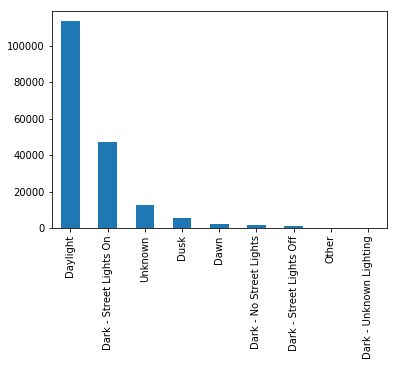

In [49]:
df_var["LIGHTCOND"].value_counts().plot(kind = "bar")

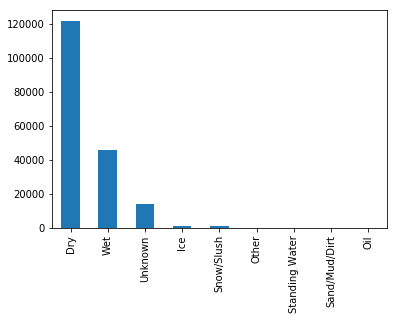

In [50]:
df_var["ROADCOND"].value_counts().plot(kind = "bar")

As a result, it would not be surprising that many of the accidents occur during the daytime, on dry ground and outdoors, when the use of vehicles is higher. At this point, looking at the second conditions where accidents occur most can help us to make a healthier decision, and we can say that most of the accidents happen in the rainy, wet and evening hours.


Before moving on to machine learning applications, arranging our data set to be suitable for work will help us get healthier results. Let's try to categorize variables and remove missing values from our data set.¶

In [57]:

df_var.dropna(inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [58]:
weather_map = {"Clear": 0, "Raining": 1, "Overcast":2, "Snowing":3,
               "Fog/Smog/Smoke":4, "Sleet/Hail/Freezing Rain":5,
               "Blowing Sand/Dirt":6, "Severe Crosswind":7, "Partly Cloudy":8}
df_var["WEATHER"] = df_var["WEATHER"].map(weather_map)
df_var["WEATHER"] = df_var["WEATHER"].astype("int64")


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


ValueError: Cannot convert non-finite values (NA or inf) to integer

In [60]:

roadcond_map = {"Dry": 0, "Wet": 1, "Ice":2, "Snow/Slush":3, "Standing Water":4,
                "Sand/Mud/Dirt":5, "Oil":6}
df_var["ROADCOND"] = df_var["ROADCOND"].map(roadcond_map)
df_var["ROADCOND"] = df_var["ROADCOND"].astype("int64")

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


ValueError: Cannot convert non-finite values (NA or inf) to integer

In [61]:

lightcond_map = {"Daylight": 0, "Dark - Street Lights On": 1, "Dusk":2, 
                 "Dawn":3, "Dark - No Street Lights":4, 
                 "Dark - Street Lights Off":5, "Dark - Unknown Lighting":6}
df_var["LIGHTCOND"] = df_var["LIGHTCOND"].map(lightcond_map)
df_var["LIGHTCOND"] = df_var["LIGHTCOND"].astype("int64")

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


ValueError: Cannot convert non-finite values (NA or inf) to integer

In [62]:
df_var["SPEEDING"] = df_var["SPEEDING"].astype("int64")


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Now we can Create our oWN MOdel

In [63]:
from sklearn import preprocessing

x = df_var.drop(["SEVERITYCODE"], axis=1)
y = df_var[["SEVERITYCODE"]]
df_var_scaled = preprocessing.StandardScaler().fit(x).transform(x)
df_var_scaled[0:3]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


array([[ 1.78236475,  1.29645692, -0.56720451, -0.2227641 ],
       [ 0.55872596,  1.29645692,  0.68627413, -0.2227641 ],
       [ 1.78236475, -0.57562397, -0.56720451, -0.2227641 ]])

In [64]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_var_scaled, y, 
                                                    test_size=0.2, random_state=42)

### KNN

In [69]:

from sklearn.neighbors import KNeighborsClassifier
k = 15
KNN = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)

KNN_Pred = KNN.predict(x_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [66]:

from sklearn.metrics import jaccard_score
j = jaccard_score(y_test, KNN_Pred)

from sklearn.metrics import f1_score
f = f1_score(y_test, KNN_Pred, average = "macro")

print("Jaccard Score of KNN:", j, "\n" "f1 Score of KNN:", f)

ImportError: cannot import name 'jaccard_score'

LOG REG Evalutaion

In [67]:

j2 = jaccard_score(y_test, Log_Reg_Pred)

f2 = f1_score(y_test, Log_Reg_Pred, average = "macro")

print("Jaccard Score of Decision Tree:", j2, "\n" "f1 Score of Decision Tree:", f2)

NameError: name 'jaccard_score' is not defined

In [68]:

Results = {'Model': ['KNN','Tree','Log Reg'],
        'Jaccard': [j,j1,j2],
        'F1': [f,f1,f2]}

df = pd.DataFrame(Results, columns = ['Model', 'Jaccard', 'F1'])

df

NameError: name 'j' is not defined

# Conclusion
It can be concluded that certain classes, such as weather conditions, road condition, driver speed, have some effect on injury in vehicle accidents under certain conditions. Our data set originally contained some variables and classes as objects, and we categorized them to apply our model on it. After getting rid of our lost values, we applied three machine learning algorithms, KNN, Decision Tree, and Logistic regression, on our model. The evaluation criteria used to test the accuracy of our models were the jaccard index and the f-1 score.